In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


# Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [3]:
# AIDS clinical trials group
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
  
# metadata 
print(aids_clinical_trials_group_study_175.metadata) 
  
# variable information 
print(aids_clinical_trials_group_study_175.variables) 


{'uci_id': 890, 'name': 'AIDS Clinical Trials Group Study 175', 'repository_url': 'https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175', 'data_url': 'https://archive.ics.uci.edu/static/public/890/data.csv', 'abstract': 'The AIDS Clinical Trials Group Study 175 Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996. The prediction task is to predict whether or not each patient died within a certain window of time or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 2139, 'num_features': 23, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Sexual Orientation', 'Race', 'Gender'], 'target_col': ['cid'], 'index_col': ['pidnum'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Fri Nov 

In [4]:
X.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,1,3,0,0,0,504,353,870,782


In [5]:
y.head()

,cid
0,0
1,1
2,0
3,0
4,0


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [7]:
df = pd.concat([X, y], axis = 1)

In [8]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [9]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [10]:
print((df["time"] == 1231).sum())

3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

In [12]:
df.isnull().sum()

time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
cid        0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.var()

time        85424.280347
trt             1.272135
age            75.847138
wtkg          175.911519
hemo            0.077106
homo            0.224166
drugs           0.114165
karnof         34.821619
oprior          0.021500
z30             0.247590
zprior          0.000000
preanti    219639.876476
race            0.205344
gender          0.142511
str2            0.242754
strat           0.808295
symptom         0.143124
treat           0.186943
offtrt          0.231281
cd40        14059.760873
cd420       20919.256876
cd80       230589.879343
cd820      198003.685916
cid             0.184331
dtype: float64

In [15]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'cid'],
      dtype='object')

In [16]:
df.shape

(2139, 24)

In [17]:
df.nunique()

time        713
trt           4
age          59
wtkg        667
hemo          2
homo          2
drugs         2
karnof        4
oprior        2
z30           2
zprior        1
preanti     813
race          2
gender        2
str2          2
strat         3
symptom       2
treat         2
offtrt        2
cd40        484
cd420       570
cd80       1090
cd820      1050
cid           2
dtype: int64

In [18]:
df.nunique() < 5

time       False
trt         True
age        False
wtkg       False
hemo        True
homo        True
drugs       True
karnof      True
oprior      True
z30         True
zprior      True
preanti    False
race        True
gender      True
str2        True
strat       True
symptom     True
treat       True
offtrt      True
cd40       False
cd420      False
cd80       False
cd820      False
cid         True
dtype: bool

# Exploratory Data Analysis

In [19]:
px.imshow(df.corr(), title = "Correlation plot")
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


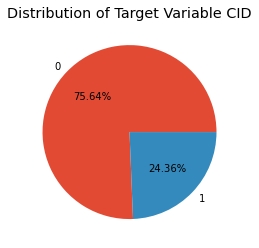

In [20]:
df.groupby('cid').size().plot(kind='pie', autopct=lambda p: f'{p:.2f}%')

plt.title("Distribution of Target Variable CID")
plt.ylabel("")
plt.show()

In [21]:
# # Pair bivariate distributions

# plt.figure(figsize=(15,10))
# sns.pairplot(df,hue="cid")
# plt.title("Looking for Insites in Data")
# plt.legend("cid")
# plt.tight_layout()
# plt.plot()

In [22]:
# Splitting categorical and numerical data

df_categoric = pd.DataFrame()
for col in df.columns :
    if df[col].nunique() <= 5:
        df_categoric[col] = df[col]
        
df_numeric = df.drop(columns = df_categoric.columns)

print("Numeric Columns:")
print(df_numeric.head())

print("\nCategorical Columns:")
print(df_categoric.head())


Numeric Columns:
   time  age     wtkg  preanti  cd40  cd420  cd80  cd820
0   948   48  89.8128        0   422    477   566    324
1  1002   61  49.4424      895   162    218   392    564
2   961   45  88.4520      707   326    274  2063   1893
3  1166   47  85.2768     1399   287    394  1590    966
4  1090   43  66.6792     1352   504    353   870    782

Categorical Columns:
   trt  hemo  homo  drugs  karnof  oprior  z30  zprior  race  gender  str2  \
0    2     0     0      0     100       0    0       1     0       0     0   
1    3     0     0      0      90       0    1       1     0       0     1   
2    3     0     1      1      90       0    1       1     0       1     1   
3    3     0     1      0     100       0    1       1     0       1     1   
4    0     0     1      0     100       0    1       1     0       1     1   

   strat  symptom  treat  offtrt  cid  
0      1        0      1       0    0  
1      3        0      1       0    1  
2      3        0      1      

In [23]:
df_cat_list = []
df_num_list =[]
for col in df.columns:
    if len(df[col].unique()) <= 4:
        df_cat_list.append(col)
    else:
        df_num_list.append(col)

In [24]:
df_cat_list, df_num_list

(['trt',
  'hemo',
  'homo',
  'drugs',
  'karnof',
  'oprior',
  'z30',
  'zprior',
  'race',
  'gender',
  'str2',
  'strat',
  'symptom',
  'treat',
  'offtrt',
  'cid'],
 ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820'])

In [25]:
df_cat_list

['trt',
 'hemo',
 'homo',
 'drugs',
 'karnof',
 'oprior',
 'z30',
 'zprior',
 'race',
 'gender',
 'str2',
 'strat',
 'symptom',
 'treat',
 'offtrt',
 'cid']

## Data Visualization

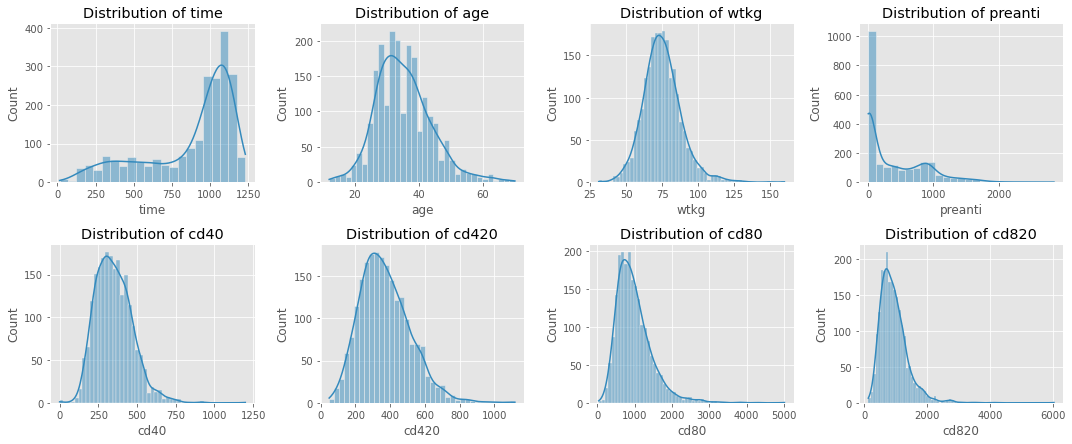

In [26]:
plt.figure(figsize = (15,15))
for i, col in enumerate(df_num_list, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

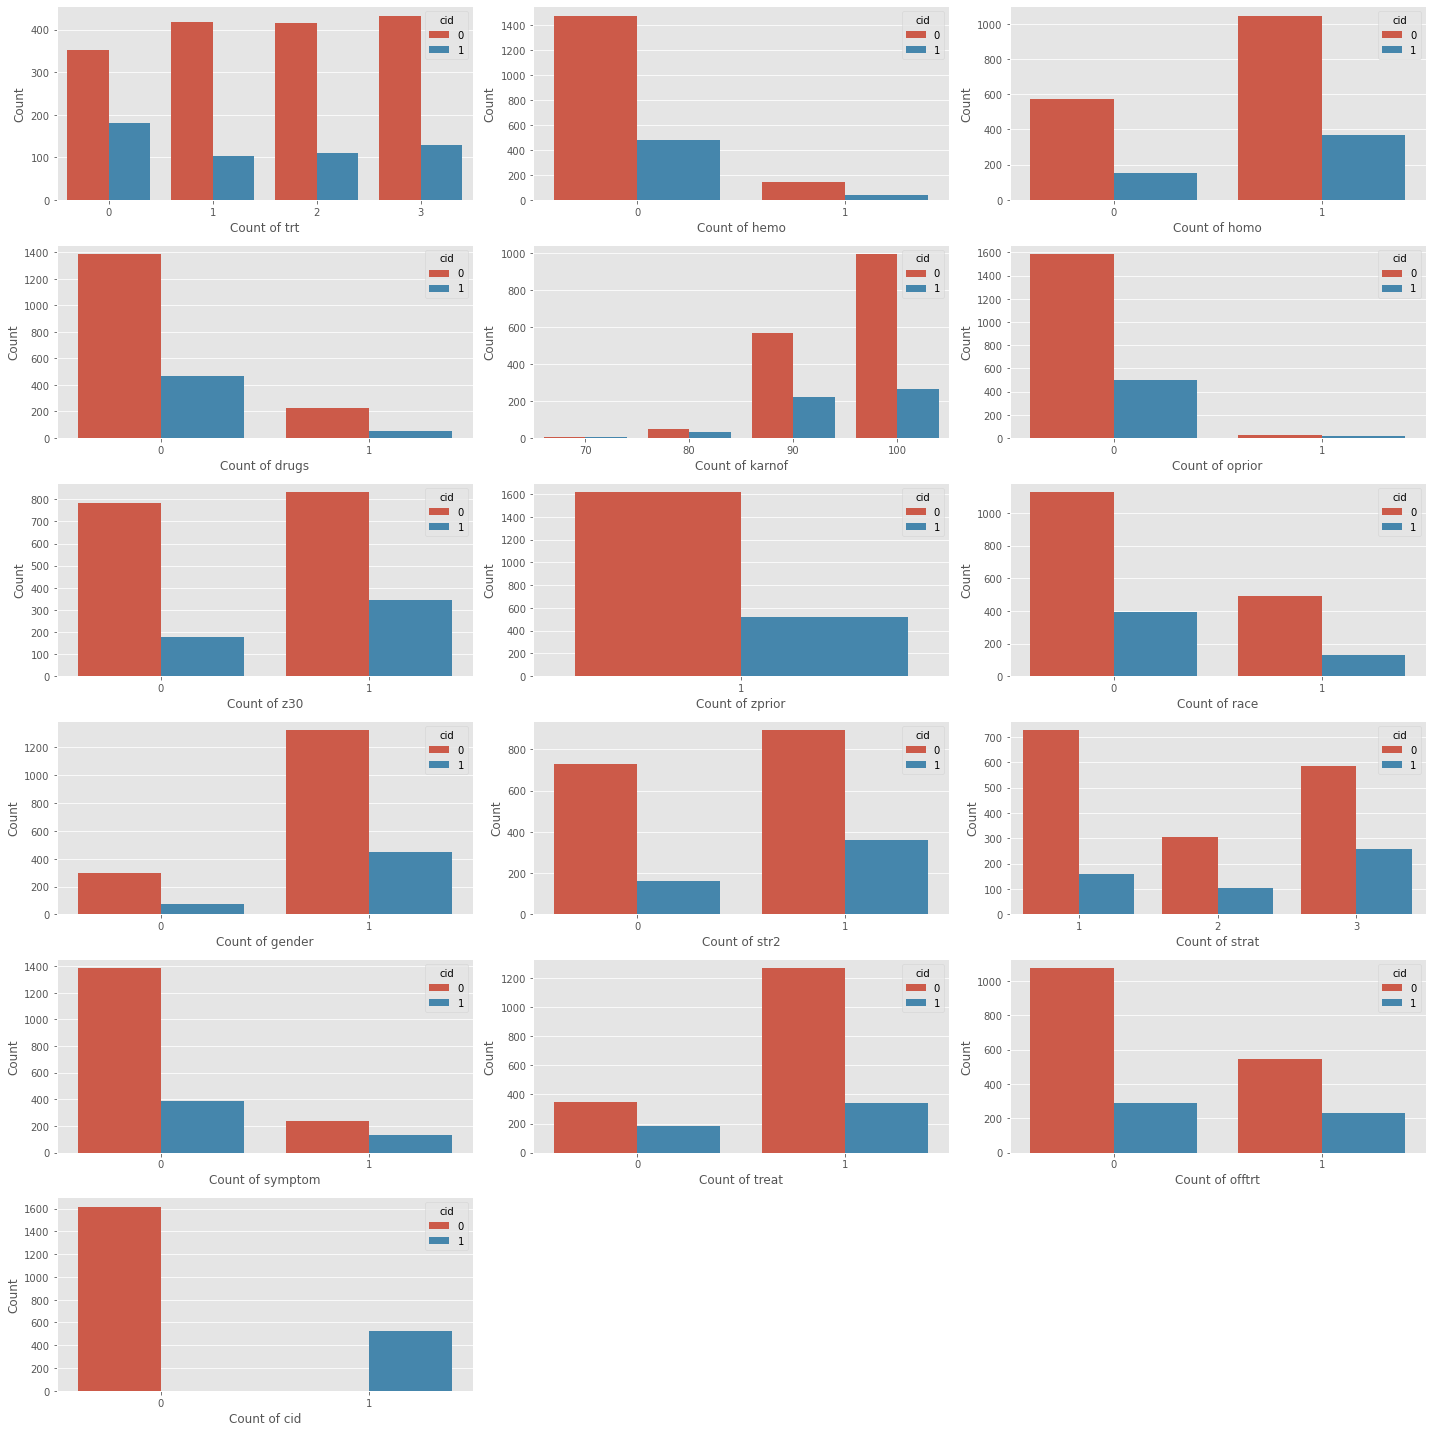

In [27]:
plt.figure(figsize = (20,20))
for i, col in enumerate(df_cat_list, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data = df, x = col, hue = "cid")
    plt.xlabel(f"Count of {col}")
    plt.ylabel("Count")
    plt.tight_layout()
plt.show()

In [28]:
# since "karnof" is a scale 0-100, we include it into numerical variable
df_numeric = pd.concat([df_numeric, df_categoric["karnof"]], axis = 1)
df_numeric.head()

,time,age,wtkg,preanti,cd40,cd420,cd80,cd820,karnof
0,948,48,89.8128,0,422,477,566,324,100
1,1002,61,49.4424,895,162,218,392,564,90
2,961,45,88.4520,707,326,274,2063,1893,90
3,1166,47,85.2768,1399,287,394,1590,966,100
4,1090,43,66.6792,1352,504,353,870,782,100


# Checking Correlation

In [29]:


df_numeric.corr(method = "spearman").style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)


,time,age,wtkg,preanti,cd40,cd420,cd80,cd820,karnof
time,1.000000,0.044681,0.019738,0.087116,0.190958,0.315865,0.022821,0.041613,0.083068
age,0.044681,1.000000,0.151817,0.127358,-0.040034,-0.049866,0.053787,0.047474,-0.084544
wtkg,0.019738,0.151817,1.000000,-0.075844,0.047455,0.031925,0.094099,0.083855,0.040878
preanti,0.087116,0.127358,-0.075844,1.000000,-0.110194,-0.203984,0.038068,0.027637,-0.039288
cd40,0.190958,-0.040034,0.047455,-0.110194,1.000000,0.620002,0.228328,0.078015,0.071484
cd420,0.315865,-0.049866,0.031925,-0.203984,0.620002,1.000000,0.059500,0.218216,0.094698
cd80,0.022821,0.053787,0.094099,0.038068,0.228328,0.059500,1.000000,0.741512,-0.003408
cd820,0.041613,0.047474,0.083855,0.027637,0.078015,0.218216,0.741512,1.000000,0.015441
karnof,0.083068,-0.084544,0.040878,-0.039288,0.071484,0.094698,-0.003408,0.015441,1.000000


In [30]:
# plt.figure(figsize = (20,20))
# sns.heatmap(df.corr(), annot = True)
# plt.show()
df[df_num_list].corr(method="spearman").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,time,age,wtkg,preanti,cd40,cd420,cd80,cd820
time,1.000000,0.044681,0.019738,0.087116,0.190958,0.315865,0.022821,0.041613
age,0.044681,1.000000,0.151817,0.127358,-0.040034,-0.049866,0.053787,0.047474
wtkg,0.019738,0.151817,1.000000,-0.075844,0.047455,0.031925,0.094099,0.083855
preanti,0.087116,0.127358,-0.075844,1.000000,-0.110194,-0.203984,0.038068,0.027637
cd40,0.190958,-0.040034,0.047455,-0.110194,1.000000,0.620002,0.228328,0.078015
cd420,0.315865,-0.049866,0.031925,-0.203984,0.620002,1.000000,0.059500,0.218216
cd80,0.022821,0.053787,0.094099,0.038068,0.228328,0.059500,1.000000,0.741512
cd820,0.041613,0.047474,0.083855,0.027637,0.078015,0.218216,0.741512,1.000000


In [31]:

df.corr(method = "spearman").style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
time,1.000000,0.085343,0.044681,0.019738,0.009185,0.062288,-0.041271,0.083068,-0.003615,0.087789,nan,0.087116,-0.075307,0.060056,0.086659,0.097266,-0.093240,0.131427,-0.497442,0.190958,0.315865,0.022821,0.041613,-0.576380
trt,0.085343,1.000000,-0.003442,-0.024592,0.012292,0.025030,0.005487,-0.016431,-0.026881,-0.001766,nan,0.002847,0.017208,0.022677,-0.003120,-0.003557,-0.000771,0.773331,-0.043424,-0.012607,0.058139,-0.016109,-0.002319,-0.083903
age,0.044681,-0.003442,1.000000,0.151817,-0.211261,0.142940,0.107105,-0.084544,0.064877,0.082805,nan,0.127358,-0.099332,0.050337,0.090988,0.115887,0.056744,0.001735,-0.055712,-0.040034,-0.049866,0.053787,0.047474,0.058419
wtkg,0.019738,-0.024592,0.151817,1.000000,-0.064746,0.176200,0.008583,0.040878,0.016334,-0.075775,nan,-0.075844,-0.105829,0.266544,-0.081208,-0.076345,0.004850,-0.034338,-0.013790,0.047455,0.031925,0.094099,0.083855,0.022481
hemo,0.009185,0.012292,-0.211261,-0.064746,1.000000,-0.391307,-0.092957,0.071876,0.034978,0.111554,nan,0.129922,-0.070333,0.115867,0.124983,0.141580,-0.076296,0.010786,0.005949,-0.024464,-0.068062,-0.064028,-0.081729,-0.011154
homo,0.062288,0.025030,0.142940,0.176200,-0.391307,1.000000,-0.206876,-0.045667,0.019743,-0.049760,nan,-0.008893,-0.307108,0.607820,-0.036700,-0.022902,0.118575,0.024407,-0.045151,-0.000872,0.026550,0.120903,0.113609,0.054279
drugs,-0.041271,0.005487,0.107105,0.008583,-0.092957,-0.206876,1.000000,-0.074506,-0.029968,0.014961,nan,-0.016797,0.082311,-0.141748,0.001106,-0.011106,0.027052,0.022055,0.098031,-0.000767,0.017040,0.009916,0.025913,-0.049794
karnof,0.083068,-0.016431,-0.084544,0.040878,0.071876,-0.045667,-0.074506,1.000000,-0.058956,-0.066541,nan,-0.039288,0.029687,-0.017098,-0.080659,-0.049203,-0.103319,-0.000578,-0.093189,0.071484,0.094698,-0.003408,0.015441,-0.098332
oprior,-0.003615,-0.026881,0.064877,0.016334,0.034978,0.019743,-0.029968,-0.058956,1.000000,-0.037580,nan,0.102971,-0.003923,0.042976,0.126040,0.134674,0.024199,-0.031801,0.019561,-0.061763,-0.117752,-0.012321,-0.041037,0.041251
z30,0.087789,-0.001766,0.082805,-0.075775,0.111554,-0.049760,0.014961,-0.066541,-0.037580,1.000000,nan,0.833125,-0.073658,-0.036119,0.903417,0.850921,0.020883,0.003776,-0.029318,-0.124483,-0.215446,0.032152,0.015752,0.125488


In [32]:
#Dropping innecessary variable "zprior", and highly correlated variables
# df.drop(["zprior", "strat", "str2"], axis = 1, inplace = True) ---> deleting variables "strat", "str2" slightly decrease the sccuracy, therefore, only "zprior is removed"

df.drop(["zprior"], axis = 1, inplace = True)

In [33]:
#Dropping variable with high correlation

In [34]:
df_cat_list = []
df_num_list =[]
for col in df.columns:
    if len(df[col].unique()) <= 4:
        df_cat_list.append(col)
    else:
        df_num_list.append(col)

In [35]:
df_cat_list

['trt',
 'hemo',
 'homo',
 'drugs',
 'karnof',
 'oprior',
 'z30',
 'race',
 'gender',
 'str2',
 'strat',
 'symptom',
 'treat',
 'offtrt',
 'cid']

In [36]:
df_cat_list.remove(df_cat_list[12])

In [37]:
df_cat_list

['trt',
 'hemo',
 'homo',
 'drugs',
 'karnof',
 'oprior',
 'z30',
 'race',
 'gender',
 'str2',
 'strat',
 'symptom',
 'offtrt',
 'cid']

In [38]:
df_num_list

['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

# Data Partioning

In [39]:
X = df.drop("cid", axis = 1)
y = df["cid"]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 100, stratify = y)

# Outliers Detection

## Univariate outliers detection

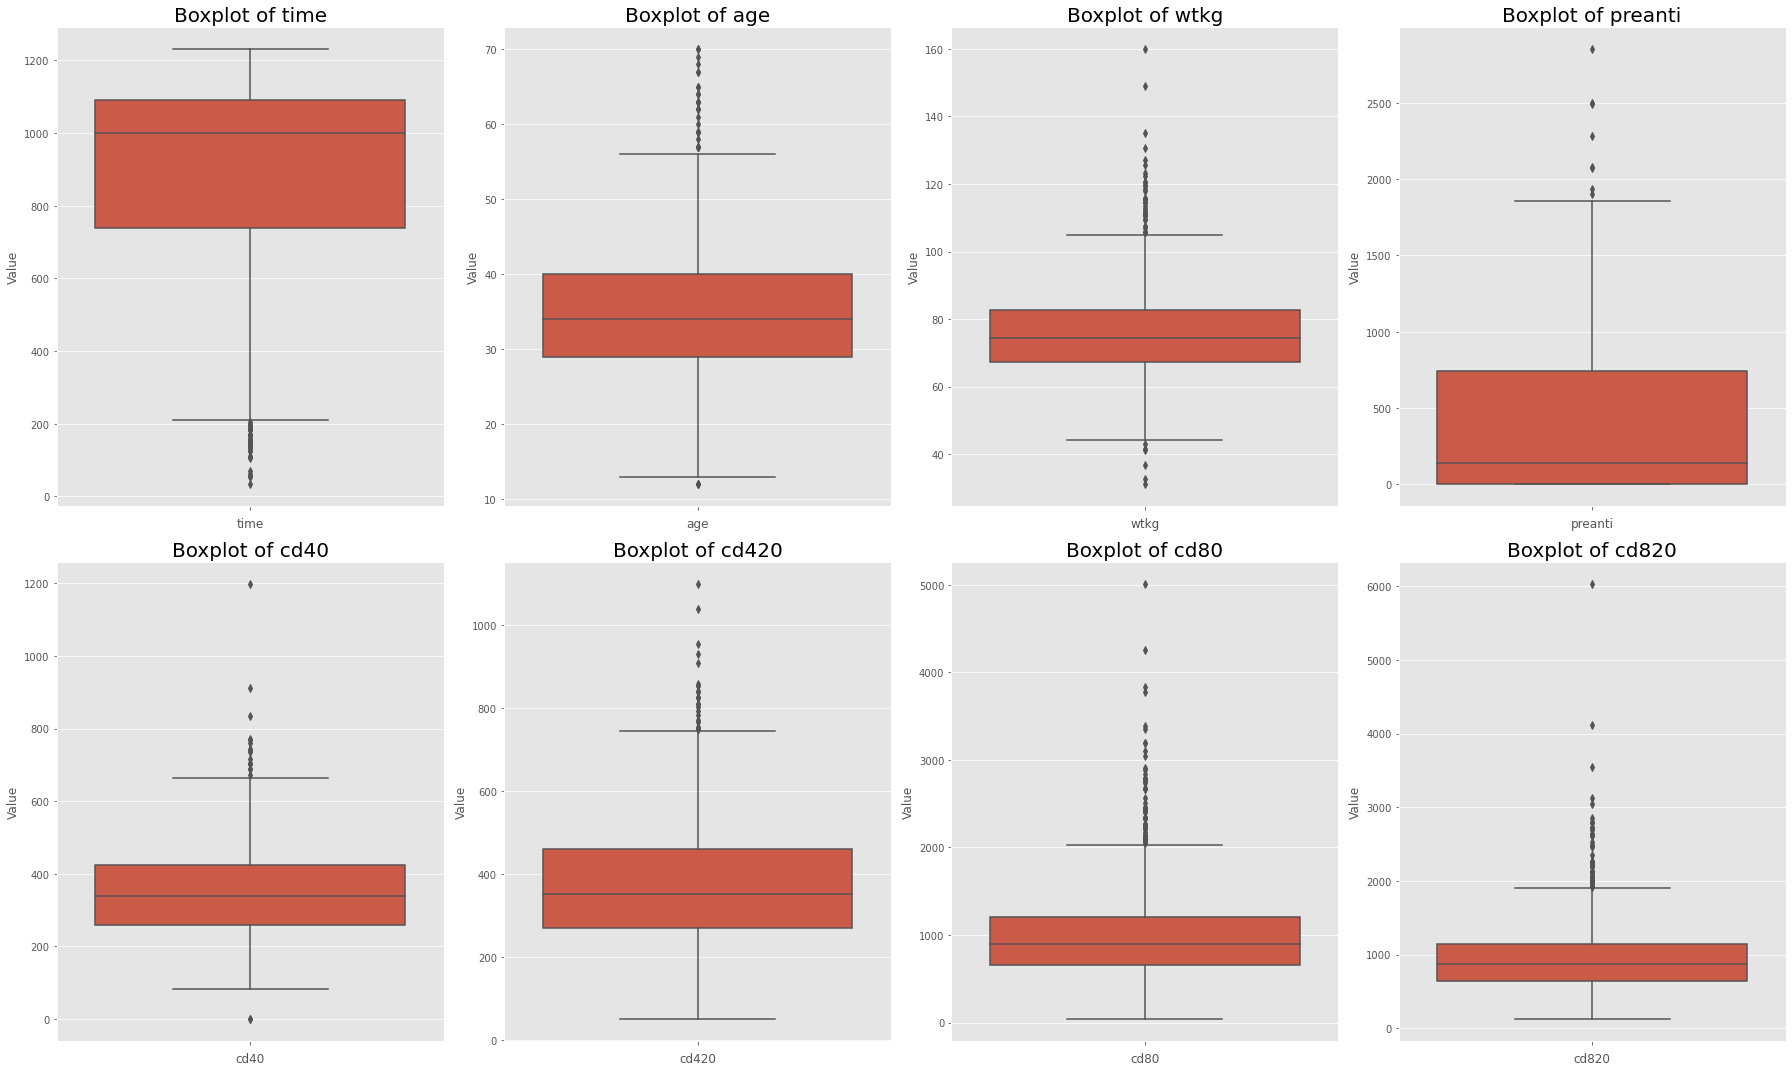

In [41]:

plt.figure(figsize=(25, 15))
for i, col in enumerate(df_num_list, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=X_train[col])
    plt.title(f"Boxplot of {col}", fontsize = 20)
    plt.xlabel(col)
    plt.ylabel("Value")

plt.tight_layout()
plt.show()


In [42]:
def is_outliers(x, k = 1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers)


In [43]:
for i, col in enumerate(X_train[df_numeric.columns]):
    outliers = is_outliers(X_train[df_numeric.columns].iloc[:, i], k = 1.8)
    print(col, np.unique(outliers, return_counts = True))


# plt.figure(figsize=(12, 8))
# sns.heatmap(outliers, cmap='viridis', cbar=False)  # cbar=False to remove the color bar
# plt.title('Outliers Heatmap (IQR method with k=1.8)')
# plt.xlabel('Features')
# plt.ylabel('Samples')
# plt.show()


time (array([False,  True]), array([1492,    5]))
age (array([False,  True]), array([1478,   19]))
wtkg (array([False,  True]), array([1465,   32]))
preanti (array([False,  True]), array([1493,    4]))
cd40 (array([False,  True]), array([1488,    9]))
cd420 (array([False,  True]), array([1483,   14]))
cd80 (array([False,  True]), array([1457,   40]))
cd820 (array([False,  True]), array([1461,   36]))
karnof (array([False,  True]), array([1495,    2]))


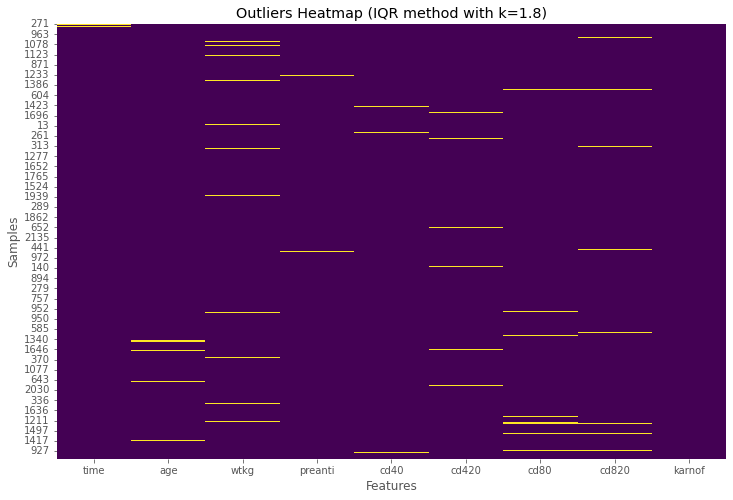

In [44]:
X_train_num = X_train[df_numeric.columns]

k = 1.8

def find_outliers(X_train_num, k = 1.8):
    Q1 = X_train_num.quantile(0.25)
    Q3 = X_train_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    outliers = (X_train_num < lower_bound) | (X_train_num > upper_bound)
    return outliers

outliers = find_outliers(X_train_num, k)
# outliers

for col in X_train_num.columns:
    median = X_train_num[col].median()
    X_train.loc[outliers[col], col] = median


plt.figure(figsize=(12, 8))
sns.heatmap(outliers, cmap='viridis', cbar=False)  # cbar=False to remove the color bar
plt.title('Outliers Heatmap (IQR method with k=1.8)')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()


In [45]:
for col in X_train_num.columns:
    median = X_train_num[col].median()
    outlier_indices = outliers[col][outliers[col]].index
    X_train.loc[outlier_indices, col] = median

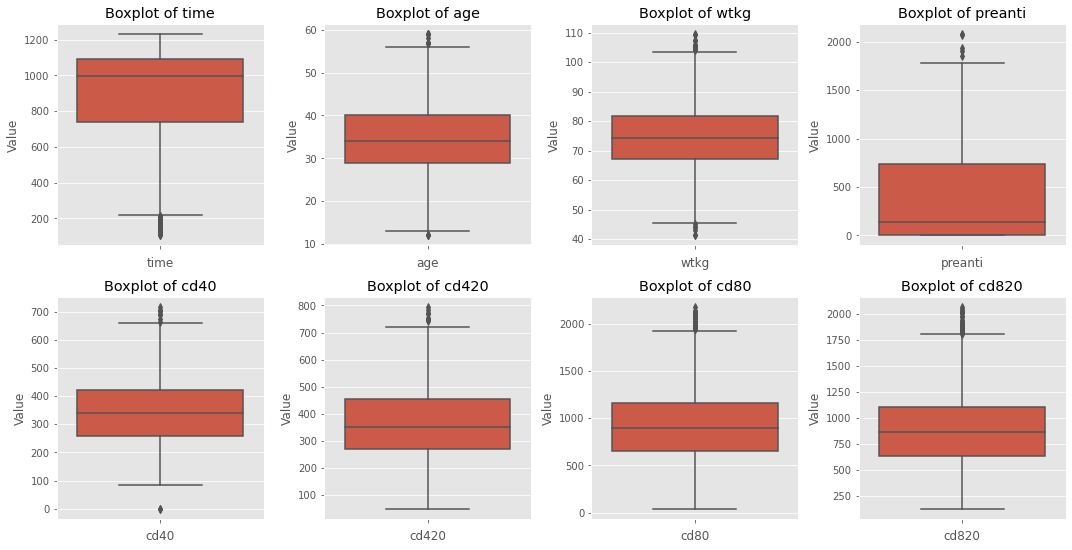

In [46]:

plt.figure(figsize=(15, 15))
for i, col in enumerate(df_num_list, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=X_train[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

In [47]:
for i, col in enumerate(X_train[df_numeric.columns]):
    outliers = is_outliers(X_train[df_numeric.columns].iloc[:, i], k = 1.8)
    print(col, np.unique(outliers, return_counts = True))

time (array([False,  True]), array([1495,    2]))
age (array([False]), array([1497]))
wtkg (array([False,  True]), array([1495,    2]))
preanti (array([False,  True]), array([1496,    1]))
cd40 (array([False,  True]), array([1496,    1]))
cd420 (array([False,  True]), array([1496,    1]))
cd80 (array([False,  True]), array([1487,   10]))
cd820 (array([False,  True]), array([1488,    9]))
karnof (array([False]), array([1497]))


## PCA

Here PCA is applied to see the shape of our dataset

### Normalizing the data for Distance Based

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
X_train.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820'],
      dtype='object')

In [50]:
df_num_list

['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

In [51]:
X_train_num = X_train[df_num_list]
X_train_cat = X_train.drop(columns = df_num_list)

X_test_num = X_test[df_num_list]
X_test_cat = X_test.drop(columns = df_num_list)

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_norm = scaler.transform(X_train_num)
X_test_num_norm = scaler.transform(X_test_num)

X_train_norm = np.hstack((X_train_num_norm, X_train_cat))
X_test_norm = np.hstack((X_test_num_norm, X_test_cat))


In [52]:
df_num_list

['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components = 2)
pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)

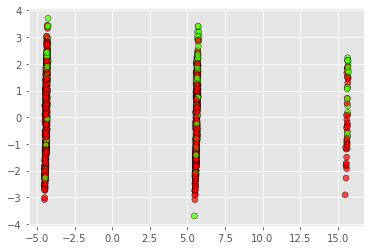

In [55]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

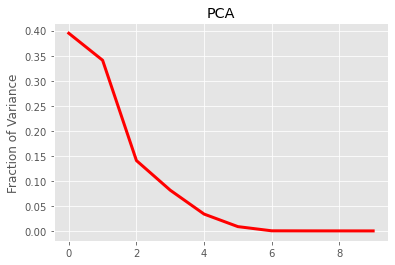

In [56]:
plt.plot(PCA(n_components=10).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

# Feature Selection using XGBoost

Here the attempt to remove the least important variables do not lead to improvement in the accuracy, therefore, we do not remove any

In [57]:
from xgboost import XGBClassifier

In [58]:
# Initialize the model (use XGBRegressor for regression tasks)
xgb = XGBClassifier(objective='binary:logistic', 
                    max_depth = 3,
                    learning_rate = 0.1,
                    gamma = 0.25,
                    reg_lambda = 1,
                    tree_method='exact',
                    use_label_encoder=False,
                    random_state=42,
                    n_estimators = 100,
                    subsample = 1
                    
                   )

# Fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

    Feature  Importance
0      time    0.232642
17   offtrt    0.113509
9       z30    0.094702
19    cd420    0.067917
14    strat    0.062179
5      homo    0.061993
10  preanti    0.049425
2       age    0.041627
4      hemo    0.040919
11     race    0.030312
20     cd80    0.028890
15  symptom    0.027578
12   gender    0.027113
3      wtkg    0.020474
21    cd820    0.020174
18     cd40    0.019060
8    oprior    0.018568
6     drugs    0.017176
7    karnof    0.015031
1       trt    0.010710
13     str2    0.000000
16    treat    0.000000


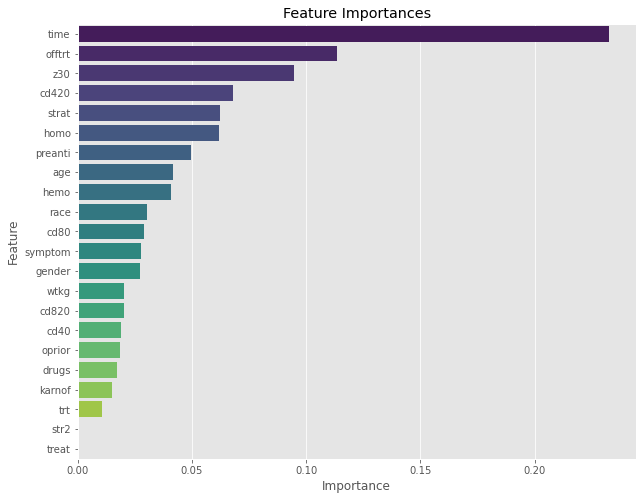

In [59]:
# Get feature importances
feature_importances = xgb.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Try to remove 0 importance features

In [60]:
X_train= X_train.drop(columns = ["str2", "treat"])
X_test = X_test.drop(columns = ["str2", "treat"])

# X_train_dimred = X_train.drop(columns = ["homo", "gender", "hemo"])
# X_test_dimred = X_test.drop(columns = ["homo", "gender", "hemo"])

In [61]:
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier

In [62]:
# %%time
# sel = RFE(DecisionTreeClassifier(), n_features_to_select=3)
# X_train_sel = sel.fit_transform(X_train, y_train)
# X_train_sel.shape
# X_test_sel = sel.transform(X_test)

## Numerical Variable

Try to have separate faeture selection for numerical and categorical variables. For VIF, no variables have signifficantly low variance.
For chi square, removeing variables having improtance < 0 leads to slight decrease in accuracy.

### Variance Inflation Factor

In [63]:


# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()

# vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# vif["features"] = X2.columns

# # print VIF values

# print(vif)

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

vif["features"] = df_numeric.columns

# print VIF values

print(vif)


   VIF Factor features
0   11.570667     time
1   16.929141      age
2   32.468357     wtkg
3    1.726147  preanti
4   18.146139     cd40
5   15.860184    cd420
6   15.433863     cd80
7   15.975247    cd820
8   51.038013   karnof


## Categorical Variables (Chi Square)

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [65]:
# X = df.drop(["cid"], axis = 1)
# y = df["cid"]

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(X[df_cat_list], y, train_size= 0.3, random_state = 0)

In [67]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature time: 43801.522219
Feature trt: 8.538755
Feature age: 7.313947
Feature wtkg: 1.989733
Feature hemo: 0.335271
Feature homo: 1.249661
Feature drugs: 4.272537
Feature karnof: 4.591686
Feature oprior: 4.033539
Feature z30: 11.301702
Feature preanti: 11164.229652
Feature race: 3.001032
Feature gender: 0.389244
Feature strat: 11.263687
Feature symptom: 14.767534
Feature offtrt: 7.894651
Feature cd40: 1630.309760
Feature cd420: 9322.107545
Feature cd80: 1032.325578
Feature cd820: 195.523024


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

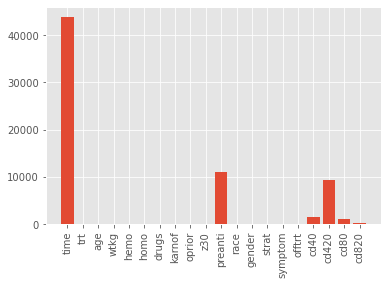

In [68]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# Get column names of X_train
feature_names = X_train.columns

# What are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (feature_names[i], fs.scores_[i]))

plt.bar(feature_names, fs.scores_)
plt.xticks(rotation=90)


In [69]:
# X = X.drop(["hemo", "homo", "gender"], axis = 1)

In [70]:
X.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,1,3,0,0,0,504,353,870,782


# Model Deployment

## K-NN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

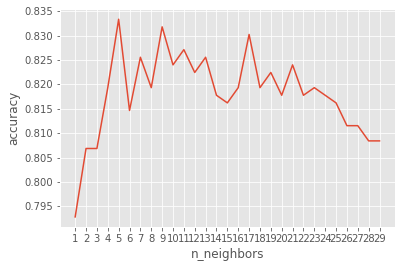

In [72]:
n_neighbors = range(1,30)
scores = list()

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    knn.fit(X_train_norm, y_train)
    scores.append(knn.score(X_test_norm, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

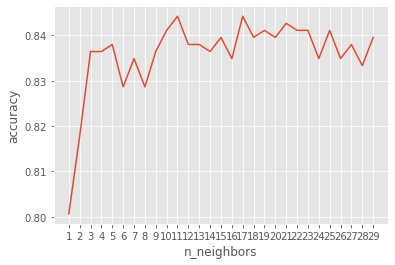

In [73]:
n_neighbors = range(1,30)
scores = list()

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, metric="euclidean")
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

In [74]:
len(X_train_norm)

1497

In [75]:
len(y_train)

1497

In [76]:
# knn = KNeighborsClassifier(n_neighbors=11, metric="euclidean", weights="uniform")
# knn.fit(X_train_sel, y_train)
# y_test_pred = knn.predict(X_test_sel)

# print('Accuracy %s' % accuracy_score(y_test, y_test_pred))
# print('F1-score %s' % f1_score(y_test, y_test_pred, average=None))
# print(classification_report(y_test, y_test_pred, digits=3))

In [77]:
knn = KNeighborsClassifier(n_neighbors=11, metric="euclidean", weights="uniform")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.8442367601246106
F1-score [0.89795918 0.67105263]
              precision    recall  f1-score   support

           0      0.891     0.905     0.898       486
           1      0.689     0.654     0.671       156

    accuracy                          0.844       642
   macro avg      0.790     0.780     0.785       642
weighted avg      0.842     0.844     0.843       642



In [78]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(knn, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.85514019 0.81775701 0.84813084 0.87149533 0.78454333]
Average CV Score:  0.8354133380025827
Number of CV Scores used in Average:  5


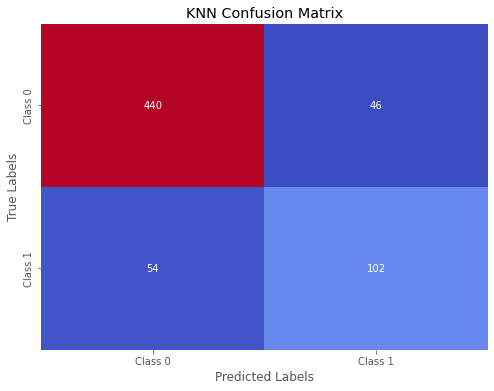

In [79]:
## Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)

plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

## Logistic Regression

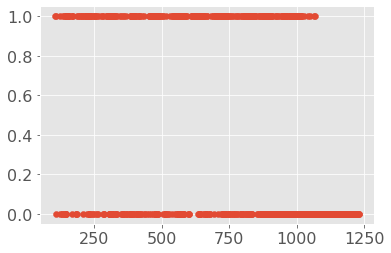

In [80]:
plt.scatter(X_train.iloc[:,0], y_train)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [81]:
# %%time
# sel = RFE(DecisionTreeClassifier(), n_features_to_select=16)
# X_train_sel = sel.fit_transform(X_train, y_train)
# X_train_sel.shape
# X_test_sel = sel.transform(X_test)

In [82]:
df.shape

(2139, 23)

In [83]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression

# # Define the model
# model = LogisticRegression()

# # Define the parameter grid
# param_dist = {
#     'penalty': ['l1', 'l2'],
#     'C': np.logspace(-4, 4, 20),
#     'solver': ['liblinear', 'saga'],
#     'max_iter': [100, 200, 300]
# }

# # Perform random search
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
# random_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)


Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'C': 78.47599703514607}
Best score: 0.8637079152731326

In [84]:
logreg = LogisticRegression(max_iter=100, dual = False)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))
print(logreg.intercept_)
print(logreg.coef_)


Accuracy 0.8473520249221184
F1-score [0.90180361 0.65734266]
              precision    recall  f1-score   support

           0      0.879     0.926     0.902       486
           1      0.723     0.603     0.657       156

    accuracy                          0.847       642
   macro avg      0.801     0.764     0.780       642
weighted avg      0.841     0.847     0.842       642

[0.026871]
[[-5.39667804e-03 -7.51577371e-02  6.52949925e-02  1.63595436e-02
  -7.09951096e-02  1.70879851e-01 -1.31585312e-01 -2.44738059e-03
   2.77447603e-02  1.35943162e-01  2.03480033e-04 -1.68937642e-01
   4.79655142e-02  2.40188930e-01  1.62895316e-01 -5.43818468e-01
   1.18200870e-03 -4.67923660e-03  8.06560967e-05  7.10329261e-04]]


/Users/andimutiazz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [85]:
# logreg = LogisticRegression(**random_search.best_params_)
# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred, digits=3))
# print(logreg.intercept_)
# print(logreg.coef_)

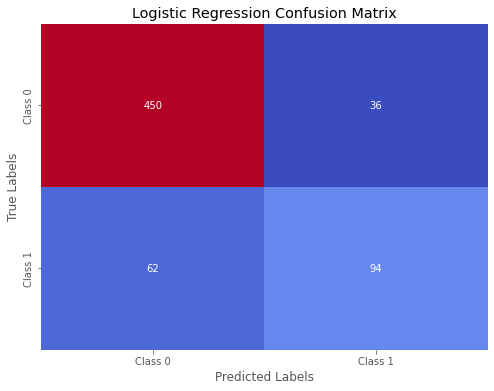

In [86]:
## Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

In [87]:

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(logreg, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

/Users/andimutiazz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/andimutiazz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users

Cross Validation Scores:  [0.85280374 0.82242991 0.86214953 0.84813084 0.81498829]
Average CV Score:  0.8401004618179432
Number of CV Scores used in Average:  5


/Users/andimutiazz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Support Vector Machine

### Linear

In [88]:
from sklearn.svm import LinearSVC

In [89]:
svm = LinearSVC(C=0.01, random_state=42, dual = False)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)



print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 3))

Accuracy 0.8520249221183801
F1-score [0.9049049  0.66666667]
              precision    recall  f1-score   support

           0      0.881     0.930     0.905       486
           1      0.736     0.609     0.667       156

    accuracy                          0.852       642
   macro avg      0.809     0.770     0.786       642
weighted avg      0.846     0.852     0.847       642



In [90]:

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(svm, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.87149533 0.8317757  0.87616822 0.86214953 0.80093677]
Average CV Score:  0.8485051106393223
Number of CV Scores used in Average:  5


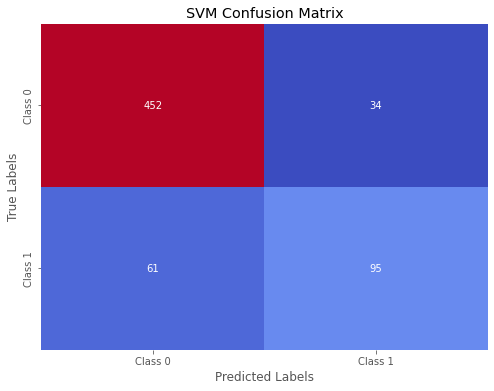

In [91]:
## Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)

plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

### Non-Linear

In [92]:
from sklearn.svm import SVC

In [93]:
# # Define the model
# model = SVC()

# # Define the parameter distribution
# param_dist = {
#     'C': np.logspace(-3, 3, 10),
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
#     # 'degree': [2, 3, 4, 5]  # Only applicable for 'poly' kernel
# }

# # Perform random search
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
# random_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

In [94]:
svc = SVC(gamma='auto', C=0.01, kernel='linear', random_state=42, class_weight="balanced", probability=True)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 3))

Accuracy 0.8473520249221184
F1-score [0.89370933 0.72928177]
              precision    recall  f1-score   support

           0      0.945     0.848     0.894       486
           1      0.641     0.846     0.729       156

    accuracy                          0.847       642
   macro avg      0.793     0.847     0.811       642
weighted avg      0.871     0.847     0.854       642



In [95]:
svc = SVC(C=0.01, kernel='linear', random_state=42, probability=True)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 3))

Accuracy 0.8473520249221184
F1-score [0.90020367 0.67549669]
              precision    recall  f1-score   support

           0      0.891     0.909     0.900       486
           1      0.699     0.654     0.675       156

    accuracy                          0.847       642
   macro avg      0.795     0.782     0.788       642
weighted avg      0.844     0.847     0.846       642



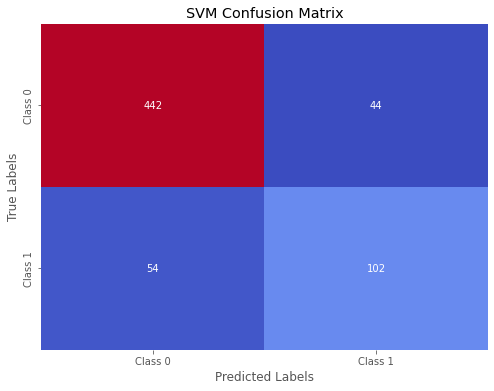

In [96]:
## Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)

plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

In [97]:
# clf = SVC(gamma='auto', C=0.01, kernel='linear', random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

In [98]:
# clf = SVC(gamma='auto', C=1, kernel='rbf', random_state=42, class_weight = "balanced")
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

In [99]:
# clf = SVC(gamma='auto', C=0.01, kernel='poly', random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf = RandomForestClassifier(n_estimators=500, 
                             criterion='entropy', 
                             max_depth=None, 
                             min_samples_split=3, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=None
                             )
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits  =3))

Accuracy 0.881619937694704
F1-score [0.92260692 0.74834437]
              precision    recall  f1-score   support

           0      0.913     0.932     0.923       486
           1      0.774     0.724     0.748       156

    accuracy                          0.882       642
   macro avg      0.844     0.828     0.835       642
weighted avg      0.879     0.882     0.880       642



In [102]:
sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(rf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.90186916 0.86214953 0.90420561 0.90654206 0.88290398]
Average CV Score:  0.8915340672809648
Number of CV Scores used in Average:  5


In [103]:
# model = RandomForestClassifier(random_state=42)

# # Define the parameter distribution
# param_dist = {
#     'n_estimators': np.arange(100, 1100, 100),
#     'max_depth': [None] + list(np.arange(10, 110, 10)),
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# # Perform random search
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
# random_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best score: 0.8977948717948717

In [104]:
rf = RandomForestClassifier(n_estimators=300, 
                             criterion='entropy', 
                             max_depth=20, 
                             min_samples_split=4, 
                             min_samples_leaf=2, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0
                             )
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits  =3))

Accuracy 0.8847352024922118
F1-score [0.92464358 0.75496689]
              precision    recall  f1-score   support

           0      0.915     0.934     0.925       486
           1      0.781     0.731     0.755       156

    accuracy                          0.885       642
   macro avg      0.848     0.832     0.840       642
weighted avg      0.883     0.885     0.883       642



In [105]:
# rf_rs = RandomForestClassifier(**random_search.best_params_)
# rf_rs.fit(X_train, y_train)

# y_pred = rf_rs.predict(X_test)
# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred, digits=4))
# print(logreg.intercept_)
# print(logreg.coef_)

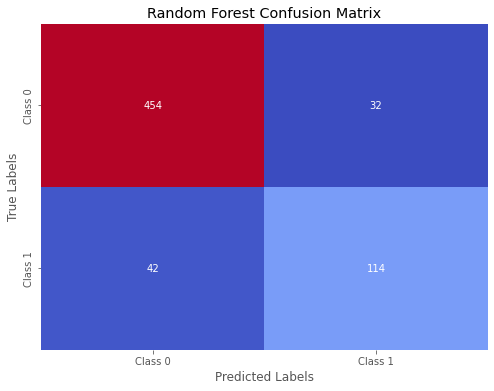

In [106]:
## Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

# XGBoost

In [107]:
# !pip install xgboost

In [108]:
from xgboost import XGBClassifier

In [109]:
xgb = XGBClassifier(objective='binary:logistic', 
                    max_depth = 3,
                    learning_rate = 0.1,
                    gamma = 0.25,
                    reg_lambda = 1,
                    tree_method='exact',
                    use_label_encoder=False,
                    random_state=42,
                    n_estimators = 100,
                    subsample = 1
                    
                   )
xgb.fit(X_train,
        y_train,)

y_pred = xgb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 3))

Accuracy 0.8862928348909658
F1-score [0.9260385  0.75420875]
              precision    recall  f1-score   support

           0      0.912     0.940     0.926       486
           1      0.794     0.718     0.754       156

    accuracy                          0.886       642
   macro avg      0.853     0.829     0.840       642
weighted avg      0.884     0.886     0.884       642



### Cross validation

In [110]:

sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(xgb, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.91121495 0.87616822 0.89719626 0.9088785  0.87822014]
Average CV Score:  0.8943356168880913
Number of CV Scores used in Average:  5


In [111]:
# param_grid ={'max_depth': [3, 4, 5],
#              'learning_rate': [0.01,  0.05, 0.1],
#              'subsample': np.arange(0.5, 1.0, 0.1),
#               'colsample_bytree': np.arange(0.5, 1.0, 0.1),
#               'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
#              'n_estimators': [100, 250, 500, 750],
#              'gamma':[0, 0.25, 1],
#             'reg_lambda':[0,1.0, 10],             
# }
# from sklearn.model_selection import GridSearchCV

In [112]:
# %%time
# optimal_params=GridSearchCV(estimator=XGBClassifier(objective='binary:logistic',
#                                                        seed=42,
#                                                        subsample=0.9,
#                                                        colsample_bytree=0.5),
                            
#                    param_grid=param_grid,
#                     scoring='roc_auc',
#                    verbose=False, 
#                      n_jobs=10,
#                     cv=3
#              )
# optimal_params.fit(X_train,
#                    y_train, 
#                    early_stopping_rounds=10,
#                   eval_metric='auc',
#                    eval_set=[(X_test, y_test)],  
#                    verbose=False)
        
# print(optimal_params.best_params_)

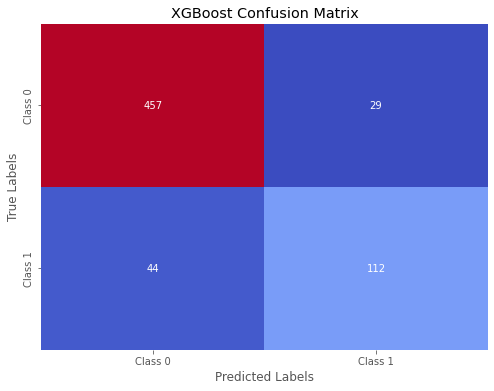

In [113]:
## Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)

plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

# CatBoost

In [114]:
# !pip install catboost

In [115]:
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier, Pool, metrics, cv

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
# # Parameter grid
# param_distributions = {
#     'learning_rate': [0.01, 0.03, 0.5, 0.1],
#     'iterations': [500, 1000, 2000],
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'bagging_temperature': [0.5, 1],
#     'subsample': [0.7, 0.8, 0.9, 1],
#     'colsample_bylevel': [0.7, 0.8, 0.9, 1],
#     'random_strength': [1, 5, 10],
#     'leaf_estimation_method': ['Newton', 'Gradient'],
#     'border_count': [32, 64, 128]
# }

# # Initialize model
# model = CatBoostClassifier(silent=True)

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_distributions,
#     n_iter=50,  # Number of parameter settings that are sampled
#     scoring='accuracy',  # Scoring metric
#     cv=5,  # Number of cross-validation folds
#     verbose=1,
#     random_state=42,
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit the model
# random_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best parameters found: ", random_search.best_params_)
# print("Best accuracy: ", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'random_strength': 1, 'learning_rate': 0.03, 'leaf_estimation_method': 'Newton', 'l2_leaf_reg': 9, 'iterations': 1000, 'depth': 10, 'colsample_bylevel': 0.8, 'border_count': 32, 'bagging_temperature': 1}
Best accuracy:  0.9011393534002229

In [118]:
catb = CatBoostClassifier(learning_rate= 0.03,
                        iterations = 1000,
                        depth=10,
                        l2_leaf_reg=9,
                        bagging_temperature=1,
                        subsample=0.8,
                        colsample_bylevel=0.8,
                        random_strength = 1,
                        leaf_estimation_method = "Newton" ,
                        border_count=32                  
                        )
catb.fit(X_train, y_train)

y_pred = catb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 3))

0:	learn: 0.6641280	total: 78.7ms	remaining: 1m 18s
1:	learn: 0.6399747	total: 94.8ms	remaining: 47.3s
2:	learn: 0.6135982	total: 103ms	remaining: 34.2s
3:	learn: 0.5892857	total: 111ms	remaining: 27.7s
4:	learn: 0.5680496	total: 127ms	remaining: 25.3s
5:	learn: 0.5558363	total: 143ms	remaining: 23.7s
6:	learn: 0.5361495	total: 146ms	remaining: 20.7s
7:	learn: 0.5188260	total: 161ms	remaining: 19.9s
8:	learn: 0.5071765	total: 178ms	remaining: 19.6s
9:	learn: 0.4961103	total: 194ms	remaining: 19.2s
10:	learn: 0.4820304	total: 202ms	remaining: 18.2s
11:	learn: 0.4677962	total: 218ms	remaining: 18s
12:	learn: 0.4546016	total: 234ms	remaining: 17.8s
13:	learn: 0.4435200	total: 250ms	remaining: 17.6s
14:	learn: 0.4309548	total: 251ms	remaining: 16.5s
15:	learn: 0.4194182	total: 259ms	remaining: 16s
16:	learn: 0.4103806	total: 275ms	remaining: 15.9s
17:	learn: 0.4022024	total: 291ms	remaining: 15.9s
18:	learn: 0.3954200	total: 307ms	remaining: 15.8s
19:	learn: 0.3879464	total: 323ms	remainin

In [119]:
catb = CatBoostClassifier(learning_rate= 0.03,
                        iterations = 500,
                        depth=4,
                        l2_leaf_reg=1,
                        bagging_temperature=1,
                        subsample=0.7,
                        colsample_bylevel=1,
                        random_strength = 10,
                        leaf_estimation_method = "Newton"                   
                        )
catb.fit(X_train, y_train)

y_pred = catb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 3))

0:	learn: 0.6650449	total: 1.76ms	remaining: 876ms
1:	learn: 0.6554124	total: 2.94ms	remaining: 731ms
2:	learn: 0.6363817	total: 4.54ms	remaining: 753ms
3:	learn: 0.6182776	total: 5.48ms	remaining: 679ms
4:	learn: 0.6114659	total: 6.38ms	remaining: 632ms
5:	learn: 0.5903921	total: 7.45ms	remaining: 613ms
6:	learn: 0.5837531	total: 8.59ms	remaining: 605ms
7:	learn: 0.5779357	total: 9.49ms	remaining: 583ms
8:	learn: 0.5562574	total: 10.6ms	remaining: 576ms
9:	learn: 0.5382504	total: 11.6ms	remaining: 569ms
10:	learn: 0.5324643	total: 12.5ms	remaining: 558ms
11:	learn: 0.5196293	total: 13.7ms	remaining: 556ms
12:	learn: 0.5160801	total: 14.8ms	remaining: 553ms
13:	learn: 0.5104062	total: 15.7ms	remaining: 546ms
14:	learn: 0.4942406	total: 16.7ms	remaining: 539ms
15:	learn: 0.4804712	total: 17.6ms	remaining: 531ms
16:	learn: 0.4625935	total: 18.4ms	remaining: 523ms
17:	learn: 0.4509183	total: 19.4ms	remaining: 519ms
18:	learn: 0.4423830	total: 20.4ms	remaining: 515ms
19:	learn: 0.4361760	t

In [120]:
# param_grid = {
#     'learning_rate': [0.01, 0.03, 0.1],
#     'iterations': [500, 1000, 2000],
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'bagging_temperature': [0.5, 1],
#     'subsample': [0.7, 0.8, 0.9, 1],
#     'colsample_bylevel': [0.7, 0.8, 0.9, 1],
#     'random_strength': [1, 5, 10],
#     'leaf_estimation_method': ['Newton', 'Gradient'],
#     'border_count': [32, 64, 128]
# }

catb = CatBoostClassifier(learning_rate= 0.01,
                        iterations = 1000,
                        depth=4,
                        l2_leaf_reg=2,
                        bagging_temperature=1,
                        subsample=0.9,
                        colsample_bylevel=0.7,
                        random_strength = 1,
                        leaf_estimation_method = "Newton"                   
                        )
catb.fit(X_train, y_train)

y_pred = catb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 3))

0:	learn: 0.6834573	total: 2.46ms	remaining: 2.46s
1:	learn: 0.6746471	total: 4.31ms	remaining: 2.15s
2:	learn: 0.6658857	total: 5.99ms	remaining: 1.99s
3:	learn: 0.6560858	total: 7.71ms	remaining: 1.92s
4:	learn: 0.6467703	total: 9.23ms	remaining: 1.84s
5:	learn: 0.6387587	total: 10.6ms	remaining: 1.76s
6:	learn: 0.6305534	total: 12ms	remaining: 1.71s
7:	learn: 0.6231387	total: 13.4ms	remaining: 1.66s
8:	learn: 0.6157991	total: 14.9ms	remaining: 1.64s
9:	learn: 0.6049405	total: 16.4ms	remaining: 1.62s
10:	learn: 0.5974339	total: 17.8ms	remaining: 1.6s
11:	learn: 0.5887589	total: 19ms	remaining: 1.57s
12:	learn: 0.5820454	total: 20.3ms	remaining: 1.54s
13:	learn: 0.5749286	total: 21.5ms	remaining: 1.51s
14:	learn: 0.5682928	total: 22.7ms	remaining: 1.49s
15:	learn: 0.5621610	total: 23.9ms	remaining: 1.47s
16:	learn: 0.5558368	total: 25ms	remaining: 1.45s
17:	learn: 0.5481347	total: 26ms	remaining: 1.42s
18:	learn: 0.5394110	total: 27ms	remaining: 1.39s
19:	learn: 0.5322532	total: 28ms	

In [121]:
y_pred = catb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 3))

Accuracy 0.8878504672897196
F1-score [0.92682927 0.76      ]
              precision    recall  f1-score   support

           0      0.916     0.938     0.927       486
           1      0.792     0.731     0.760       156

    accuracy                          0.888       642
   macro avg      0.854     0.835     0.843       642
weighted avg      0.886     0.888     0.886       642



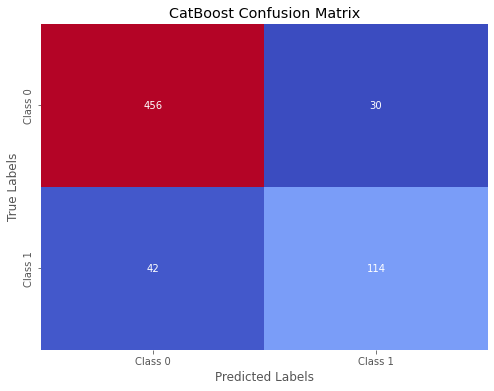

In [122]:
## Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)

plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()

In [123]:
# Crorss Vlidation

sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(catb, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

0:	learn: 0.6829939	total: 1.08ms	remaining: 1.08s
1:	learn: 0.6736054	total: 2.56ms	remaining: 1.27s
2:	learn: 0.6628232	total: 3.69ms	remaining: 1.23s
3:	learn: 0.6534488	total: 4.89ms	remaining: 1.22s
4:	learn: 0.6439014	total: 6.16ms	remaining: 1.23s
5:	learn: 0.6344199	total: 7.54ms	remaining: 1.25s
6:	learn: 0.6227215	total: 8.68ms	remaining: 1.23s
7:	learn: 0.6151565	total: 9.94ms	remaining: 1.23s
8:	learn: 0.6064854	total: 11.1ms	remaining: 1.22s
9:	learn: 0.5989424	total: 12.3ms	remaining: 1.22s
10:	learn: 0.5916593	total: 13.4ms	remaining: 1.21s
11:	learn: 0.5842342	total: 14.5ms	remaining: 1.19s
12:	learn: 0.5763759	total: 15.5ms	remaining: 1.18s
13:	learn: 0.5690499	total: 16.7ms	remaining: 1.17s
14:	learn: 0.5627911	total: 17.7ms	remaining: 1.17s
15:	learn: 0.5557514	total: 19ms	remaining: 1.17s
16:	learn: 0.5484732	total: 20.1ms	remaining: 1.16s
17:	learn: 0.5411093	total: 21.1ms	remaining: 1.15s
18:	learn: 0.5349954	total: 22.2ms	remaining: 1.14s
19:	learn: 0.5289788	tot

# ROC Curve

/Users/andimutiazz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0:	learn: 0.6834573	total: 2.28ms	remaining: 2.28s
1:	learn: 0.6746471	total: 4.55ms	remaining: 2.27s
2:	learn: 0.6658857	total: 7.36ms	remaining: 2.45s
3:	learn: 0.6560858	total: 8.78ms	remaining: 2.19s
4:	learn: 0.6467703	total: 10.2ms	remaining: 2.02s
5:	learn: 0.6387587	total: 11.6ms	remaining: 1.91s
6:	learn: 0.6305534	total: 12.8ms	remaining: 1.81s
7:	learn: 0.6231387	total: 14.2ms	remaining: 1.75s
8:	learn: 0.6157991	total: 15.5ms	remaining: 1.71s
9:	learn: 0.6049405	total: 16.9ms	remaining: 1.68s
10:	learn: 0.5974339	total: 18.4ms	remaining: 1.66s
11:	learn: 0.5887589	total: 20ms	remaining: 1.65s
12:	learn: 0.5820454	total: 21.2ms	remaining: 1.61s
13:	learn: 0.5749286	total: 23ms	remaining: 1.62s
14:	learn: 0.5682928	total: 24.7ms	remaining: 1.62s
15:	learn: 0.5621610	total: 25.7ms	remaining: 1.58s
16:	learn: 0.5558368	total: 26.9ms	remaining: 1.56s
17:	learn: 0.5481347	total: 28.5ms	remaining: 1.55s
18:	learn: 0.5394110	total: 29.9ms	remaining: 1.54s
19:	learn: 0.5322532	total

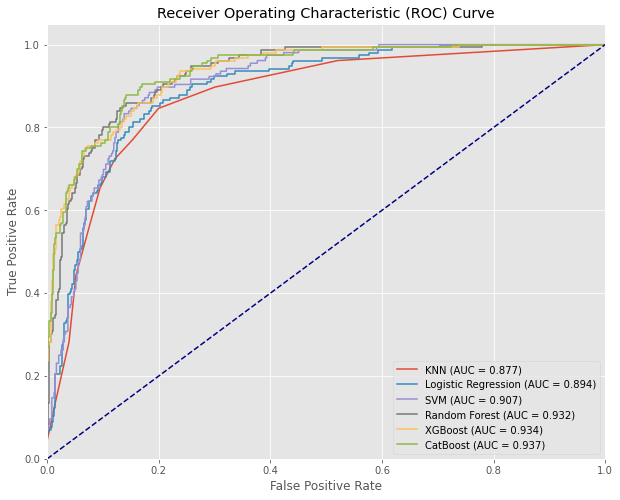

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score

models = {
    'KNN' : knn,
    'Logistic Regression' : logreg,
    'SVM' :svc,
    'Random Forest' : rf,
    'XGBoost' : xgb,
    'CatBoost' : catb
}

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict_proba(X_test)[:, 1]  # get probability estimates for the positive class

# Calculate ROC curve and AUC for each model
roc_data = {}
for name, probs in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    roc_data[name] = (fpr, tpr, auc)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance

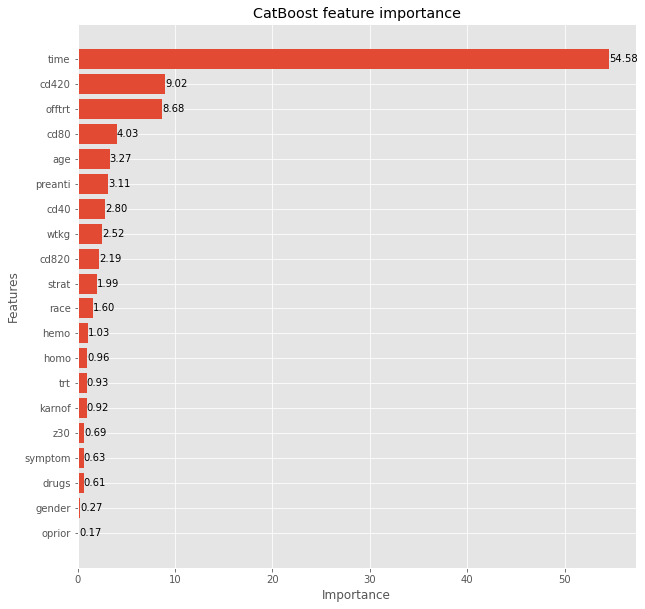

In [125]:
feature_importance = catb.get_feature_importance()
faeture_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize = (10,10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")

for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f"{value:.2f}", va = 'center')

plt.gca().invert_yaxis()
plt.title("CatBoost feature importance")
plt.show()

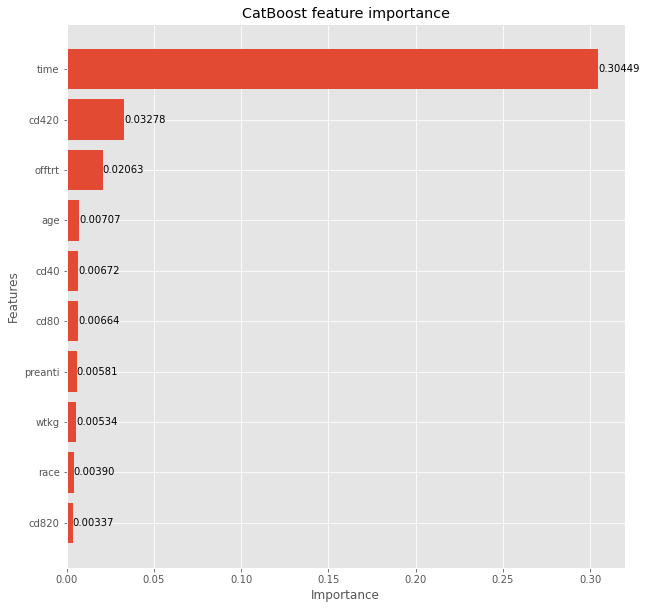

In [126]:
feature_importance = catb.get_feature_importance(data = Pool(X_train, y_train),type = 'LossFunctionChange')
faeture_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_10 = importance_df.head(10)

plt.figure(figsize = (10,10))
plt.barh(top_10['Feature'], top_10['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")


for index, value in enumerate(top_10['Importance']):
    plt.text(value, index, f"{value:.5f}", va = 'center')

plt.gca().invert_yaxis()
plt.title("CatBoost feature importance")
plt.show()

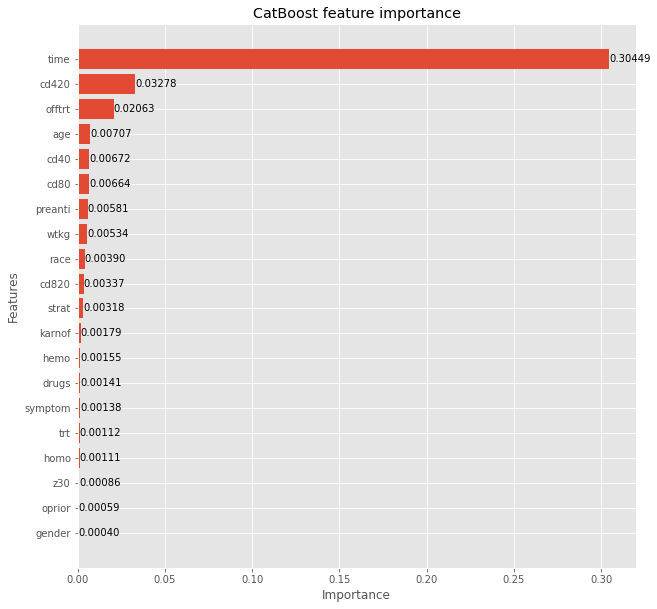

In [127]:
feature_importance = catb.get_feature_importance(data = Pool(X_train, y_train),type = 'LossFunctionChange')
faeture_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize = (10,10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")


for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f"{value:.5f}", va = 'center')

plt.gca().invert_yaxis()
plt.title("CatBoost feature importance")
plt.show()

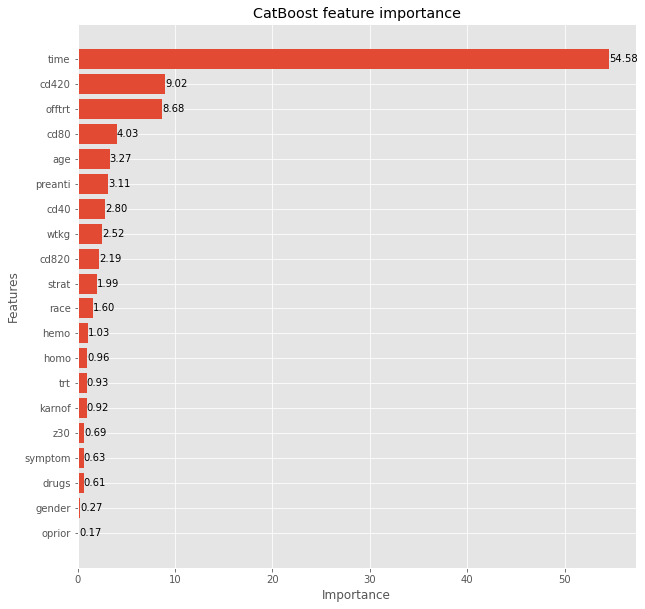

In [128]:
feature_importance = catb.get_feature_importance(data = Pool(X_train, y_train),type = 'PredictionValuesChange')
faeture_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize = (10,10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")


for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f"{value:.2f}", va = 'center')

plt.gca().invert_yaxis()
plt.title("CatBoost feature importance")
plt.show()

In [129]:
# X_train_fi = X_train.drop(["oprior", "str2", "treat", "gender", "z30", "homo"], axis = 1)
# X_test_fi = X_test.drop(["oprior", "str2", "treat", "gender", "z30", "homo"], axis = 1)

KeyError: "['str2', 'treat'] not found in axis"

In [ ]:
# catb = CatBoostClassifier(learning_rate= 0.01,
#                         iterations = 1000,
#                         depth=4,
#                         l2_leaf_reg=2,
#                         bagging_temperature=1,
#                         subsample=0.9,
#                         colsample_bylevel=0.7,
#                         random_strength = 1,
#                         leaf_estimation_method = "Newton"                   
#                         )
# catb.fit(X_train_fi, y_train)

# y_pred_fi = catb.predict(X_test_fi)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred, digits = 3))

0:	learn: 0.6835952	total: 1.14ms	remaining: 1.14s
1:	learn: 0.6753578	total: 2.35ms	remaining: 1.17s
2:	learn: 0.6662677	total: 3.39ms	remaining: 1.13s
3:	learn: 0.6570932	total: 4.46ms	remaining: 1.11s
4:	learn: 0.6480744	total: 5.57ms	remaining: 1.11s
5:	learn: 0.6390690	total: 6.64ms	remaining: 1.1s
6:	learn: 0.6281501	total: 7.64ms	remaining: 1.08s
7:	learn: 0.6193336	total: 8.85ms	remaining: 1.1s
8:	learn: 0.6102683	total: 10.1ms	remaining: 1.11s
9:	learn: 0.6028679	total: 11.2ms	remaining: 1.1s
10:	learn: 0.5947726	total: 12.2ms	remaining: 1.1s
11:	learn: 0.5862698	total: 13.3ms	remaining: 1.1s
12:	learn: 0.5796834	total: 14.7ms	remaining: 1.12s
13:	learn: 0.5725719	total: 16.1ms	remaining: 1.13s
14:	learn: 0.5662204	total: 17.3ms	remaining: 1.14s
15:	learn: 0.5598320	total: 18.3ms	remaining: 1.13s
16:	learn: 0.5533991	total: 19.3ms	remaining: 1.11s
17:	learn: 0.5465547	total: 20.4ms	remaining: 1.11s
18:	learn: 0.5413004	total: 21.5ms	remaining: 1.11s
19:	learn: 0.5338168	total:

In [ ]:
# xgb = XGBClassifier(objective='binary:logistic', 
#                     max_depth = 3,
#                     learning_rate = 0.1,
#                     gamma = 0.25,
#                     reg_lambda = 1,
#                     tree_method='exact',
#                     use_label_encoder=False,
#                     random_state=42,
#                     n_estimators = 100,
#                     subsample = 1
                    
#                    )
# xgb.fit(X_train_fi, y_train,)

# y_pred = xgb.predict(X_test_fi)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred, digits = 3))

Accuracy 0.881619937694704
F1-score [0.92276423 0.74666667]
              precision    recall  f1-score   support

           0      0.912     0.934     0.923       486
           1      0.778     0.718     0.747       156

    accuracy                          0.882       642
   macro avg      0.845     0.826     0.835       642
weighted avg      0.879     0.882     0.880       642

